In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [6]:
y_test_prediction = classifier.predict(X_test)
print(y_test_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [7]:
comparison = pd.DataFrame({'Actual' :  y_test, 'Predicted' : y_test_prediction})
print(comparison[0:10])

     Actual  Predicted
285       0          0
101       0          0
581       0          0
352       0          0
726       0          0
472       0          0
233       0          0
385       0          0
556       0          0
59        0          0


In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_prediction))

0.7748917748917749


In [9]:
y_train_prediction = classifier.predict(X_train)
print(accuracy_score(y_train, y_train_prediction))

0.7746741154562383


In [10]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)
print(conf_mat)

[[132  14]
 [ 38  47]]


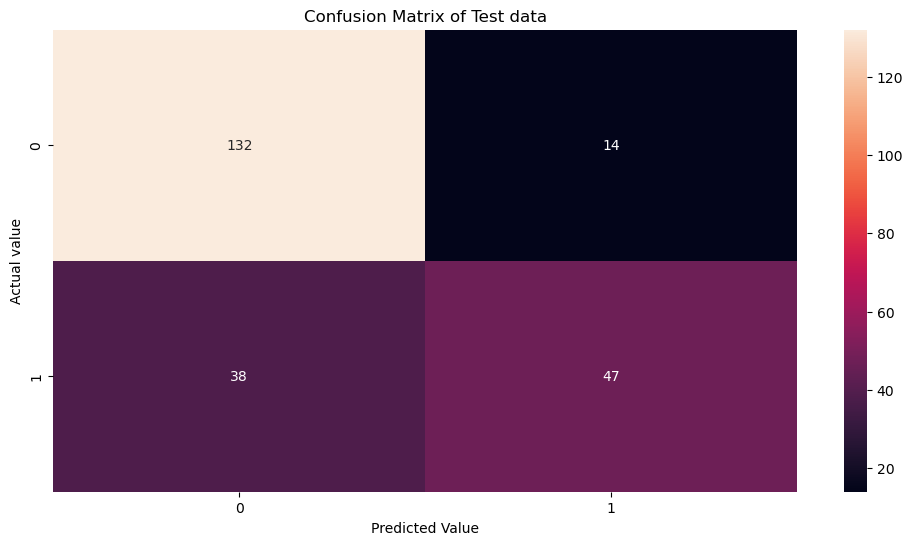

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')
plt.show()

You can try Naive Bayes and other methods on same dataset to compare the classifiers : Generally Naive Bayes' prediction is lower in accuracy to logistic 

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [15]:
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TP = conf_mat[1][1]

In [17]:
recall = TP/(TP+FN)
print("Recall: ", recall)

precision = TP/(TP+FP)
print("Precision: ", precision)

specificity = TN/(TN+FP)
print("Specificity: ", specificity)

accuracy = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy: ", accuracy)

Recall:  0.5529411764705883
Precision:  0.7704918032786885
Specificity:  0.9041095890410958
Accuracy:  0.7748917748917749
